## Data Analysis Question: Which Region of Africa has been Worst Hit by Covid-19?

Source: EU Open Data Portal(data.europa.eu)

Data Analyst: Alex Idachaba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import dataset
region = pd.read_csv('COVID_19.csv')
region.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
1,31/05/2020,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
2,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia


In [3]:
# Check for duplicate record
region.duplicated().any()

False

In [4]:
# Check for Null values
region.isna().any()

dateRep                    False
day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
geoId                       True
countryterritoryCode        True
popData2018                 True
continentExp               False
dtype: bool

In [5]:
# Lets rename some columns
region.rename(columns={'countriesAndTerritories':'countries',
                       'continentExp':'continents'},inplace=True)

In [6]:
region.head(3)

,dateRep,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continents
0,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
1,31/05/2020,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
2,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia


In [7]:
# Get all the African countries
continent = region['continents'] == 'Africa'
africa = region[continent]

In [8]:
# Look at the list of all the African countries
africa['countries'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina_Faso',
       'Burundi', 'Cameroon', 'Cape_Verde', 'Central_African_Republic',
       'Chad', 'Comoros', 'Congo', 'Cote_dIvoire',
       'Democratic_Republic_of_the_Congo', 'Djibouti', 'Egypt',
       'Equatorial_Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea_Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao_Tome_and_Principe', 'Senegal',
       'Seychelles', 'Sierra_Leone', 'Somalia', 'South_Africa',
       'South_Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda',
       'United_Republic_of_Tanzania', 'Western_Sahara', 'Zambia',
       'Zimbabwe'], dtype=object)

In [9]:
# Lets divide the countries into sub-region
north_africa = ['Algeria', 'Egypt','Libya', 'Morocco', 'Sudan', 'Tunisia', 
                'Cape_Verde', 'Western_Sahara']
east_africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea',
               'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
              'Rwanda', 'Seychelles', 'Somalia', 'South_Sudan', 'United_Republic_of_Tanzania',
              'Uganda', 'Zambia', 'Zimbabwe']
central_africa = ['Angola', 'Cameroon', 'Central_African_Republic', 'Chad',
                  'Democratic_Republic_of_the_Congo', 'Congo', 'Equatorial_Guinea',
                 'Gabon', 'Sao_Tome_and_Principe']
west_africa = ['Benin', 'Burkina_Faso', 'Cote_dIvoire', 'Gambia', 'Ghana', 'Guinea',
              'Guinea_Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria',
              'Senegal', 'Sierra_Leone', 'Togo']
south_africa = ['Botswana', 'Lesotho', 'Namibia', 'South_Africa', 'Eswatini']

In [10]:
# Write a function to group countries into region
def afri_region(region):
    if region in north_africa:
        return 'north'
    if region in east_africa:
        return 'east'
    if region in central_africa:
        return 'central'
    if region in west_africa:
        return 'west'
    if region in south_africa:
        return 'south'


In [11]:
# Create new column for region
africa['regions'] = africa['countries'].apply(afri_region)

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
region_grp = africa.groupby('regions')

In [13]:
# Count cases in each regions
region_grp.sum()['cases']

regions
central    15883
east       13893
north      48903
south      33032
west       35285
Name: cases, dtype: int64

In [14]:
region_grp.sum()['cases'].sum()

146996

In [15]:
region = ['central_africa', 'east_africa', 'north_africa', 'south_africa', 'west_africa']

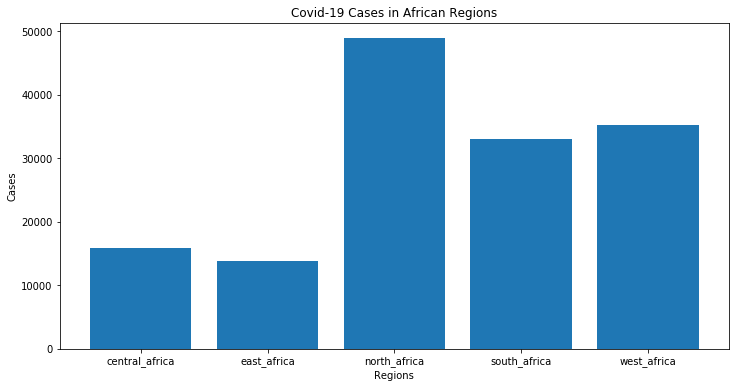

In [16]:
# Plot the bar chart
plt.figure(figsize=(12,6))
plt.title('Covid-19 Cases in African Regions')
y = region_grp.sum()['cases']
plt.bar(region, y)
plt.xlabel('Regions')
plt.ylabel('Cases')
plt.show()

In [17]:
# Export data with regions
africa.to_csv('africa_covid_data.csv', encoding='utf-8',index=False)